## Understanding Dataset/DataLoader functions in pytorch 
This notebook explains the key concepts of PyTorch's Dataset/DataLoader.

### What is a DataLoader?

A **DataLoader** is a PyTorch utility that helps you:

- Load data efficiently from a dataset.
- Group data into **mini-batches**.
- Optionally **shuffle** the data at the start of each training **epoch**.
- Provide an **iterable** (like a `for` loop) that gives you small chunks of data at a time.

---

###  Example Dataset (Viscoelasticity)

Imagine you have experimental simulations for **viscoelastic materials**. For each time step, your dataset stores:

| Feature   | Description                              |
|-----------|------------------------------------------|
| `eps_t`   | Total strain at time `t`                 |
| `d_eps_t` | Strain rate (change of strain)           |
| `eps_v_t` | Viscoelastic strain                      |
| `d_t`     | Time step size                           |
| `pi_n1`   | **Target**: total energy at next step    |

### Input Features (`X`)

| `eps_t` | `d_eps_t` | `eps_v_t` | `d_t` |
|--------:|----------:|----------:|------:|
| 0.01    | 0.001     | 0.008     | 0.1   |
| 0.02    | 0.0012    | 0.015     | 0.1   |
| ...     | ...       | ...       | ...   |

### Target (`y`)

| `pi_n1` |
|--------:|
| 1.2     |
| 1.8     |
| ...     |

---



### What is Batch Size?

Instead of feeding all the data to the model at once (which can be slow and memory-intensive), we split it into **mini-batches**.

For example:
- If you have **1,000** data points
- And `batch_size = 100`

You’ll have **10 batches per epoch** (`1000 ÷ 100 = 10`)

Each batch is:
- A matrix of shape `[100, 4]` for input features
- A vector of shape `[100]` for targets

---

### What is Shuffle?

If you always feed the model data in the same order, it may learn patterns in the **sequence** rather than in the data itself.

- `shuffle=True` tells the DataLoader to **randomly mix** the data before each epoch
- This helps the model **generalize** and reduces **overfitting**

---

### What is an Epoch?

An **epoch** is **one full pass** through the entire dataset.

For example:
- 1,000 samples
- `batch_size = 100`

 1 epoch = 10 batches

We often train over **many epochs** (like 100 or 500) to let the model keep improving.

---



#### Visualizing Batches and Epochs with Matplotlib (Single Input x)

This example demonstrates how PyTorch's `DataLoader` splits a dataset into batches and processes it across multiple epochs. 
We use a simple sine function as the target to illustrate:

- **Input (`x`)**: A set of evenly spaced values between 0 and 2π.
- **Output (`y`)**: Corresponding sine values, i.e., `y = sin(x)`.
- **Batching**: Data is grouped into mini-batches based on the defined `batch_size`.
- **Epochs**: The dataset is either shuffled or not shuffled and reprocessed `num_epochs` times.

Each subplot shows the distribution of batches during a specific epoch, with different colors representing different batches.

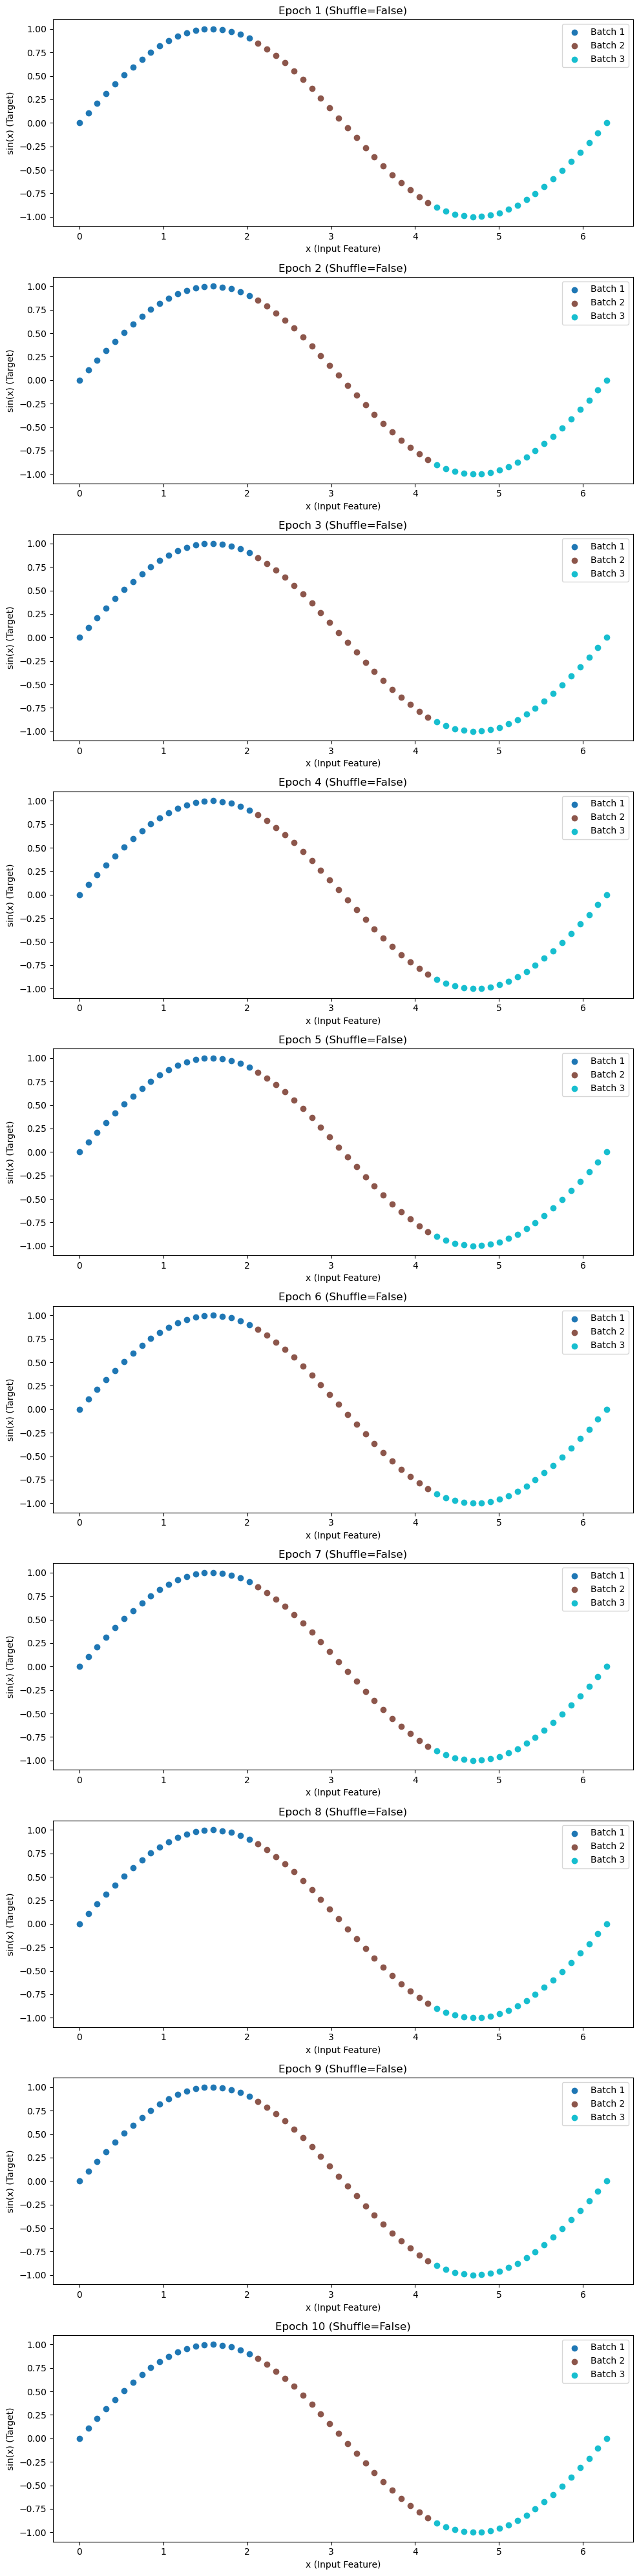

In [2]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

# PARAMETERS (Adjust these!)
batch_size = 20    
num_epochs = 10     
shuffle = False      

# Generate sine wave data
x_vals = torch.linspace(0, 2 * np.pi, 60).reshape(-1, 1)
X = x_vals
y = torch.sin(x_vals).squeeze()

# Create dataset
dataset = TensorDataset(X, y)

# Store data for plotting
epoch_data = {}

# Loop over epochs
for epoch in range(num_epochs):
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    batch_points = []

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        for i in range(len(targets)):
            batch_points.append({
                'epoch': epoch + 1,
                'batch': batch_idx + 1,
                'x_val': inputs[i].item(),
                'y_val': targets[i].item(),
            })
    epoch_data[epoch + 1] = batch_points

# Plotting
fig, axs = plt.subplots(num_epochs, 1, figsize=(10, 4 * num_epochs))
if num_epochs == 1:
    axs = [axs]

for i, epoch in enumerate(epoch_data):
    ax = axs[i]
    data = epoch_data[epoch]
    colors = plt.cm.tab10(np.linspace(0, 1, len(set(d['batch'] for d in data))))

    for batch_num in sorted(set(d['batch'] for d in data)):
        batch_points = [(d['x_val'], d['y_val']) for d in data if d['batch'] == batch_num]
        xs, ys = zip(*batch_points)
        ax.scatter(xs, ys, label=f"Batch {batch_num}", color=colors[batch_num - 1])

    ax.set_title(f"Epoch {epoch} (Shuffle={shuffle})")
    ax.set_xlabel("x (Input Feature)")
    ax.set_ylabel("sin(x) (Target)")
    ax.legend()

plt.tight_layout()
plt.show()


##  Take away

| Term         | Meaning                                                        |
|--------------|----------------------------------------------------------------|
| `epoch`      | One full loop through the dataset                              |
| `batch_size` | Number of data samples per mini-batch                          |
| `shuffle`    | Randomize the order of data before each epoch                  |
| `DataLoader` | Tool that gives you data in batches, with optional shuffling   |